### CLUSTERING TWEET SENTIMENT BASED ON USER LOCATION

<div class="alert alert-block alert-info">
<b><h3>The notebook contains clustering techniques to cluster twitter users based on the Sentiment and Suicide Ideation and their location</h3></b>
    The following steps have beenn followed:
    <ul><li>Importing the Classified Dataset</li>
        <li>Clean the location data</li>
        <li>Filter the Negative Sentiment Users</li>
        <li>Perform Clustering based on their location : K-Means, DBScan</li>
        <li>Filter the PotentialSuicidal Sentiment Users</li>
        <li>Perform Clustering based on their location : K-Means</li></ul>
</div>
<a id="clean2017"></a>

### Import the libraries.

In [218]:
from __future__ import print_function
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd
import math
import numpy as np
import csv
import sys
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from wordcloud import WordCloud
%matplotlib inline

### Import the Dataset

In [209]:
df =pd.read_csv('output.csv',index_col='Unnamed: 0')
print(df.shape)
df.head(2)

(17746, 10)


,User_id,Username,User_location,Place_CountryCode,Place_FullName,Original_Tweet,Clean_Tweet,Place_Coordinates,Suicide_Ideation,sentiment
0,412770174.0,momariedavison,"Minnetonka, MN",US,"Prior Lake, MN",truly sooo glad i’ve been distancing myself fr...,truly glad specific people feel becoming happi...,"[[[-93.489043, 44.685054], [-93.489043, 44.761...",Not_Suicide_Post,Positive
1,74008370.0,juarus,"Gadsden, Alabama",US,"Gadsden, AL",little smoked chicken potpie action eastsidepi...,little smoked chicken potpie action,"[[[-86.079043, 33.933091], [-86.079043, 34.073...",Not_Suicide_Post,Positive


### Filter the Positive Sentiment Tweets

In [214]:
Pos = df.loc[df['sentiment'] == 'Positive']
header =['Clean_Tweet','sentiment']
Pos.to_csv('Positive.csv', columns = header)
Post = pd.read_csv("Positive.csv") 
Post.head(2)

,Unnamed: 0,Clean_Tweet,sentiment
0,0,truly glad specific people feel becoming happi...,Positive
1,1,little smoked chicken potpie action,Positive


### Filter the Negative Sentiment Tweets

In [215]:

Neg= df.loc[df['sentiment'] == 'Negative']
header =['Clean_Tweet','sentiment']
Neg.to_csv('Negative.csv', columns = header)
Nega= pd.read_csv("Negative.csv")
Nega.head(2)

,Unnamed: 0,Clean_Tweet,sentiment
0,3,clown know everything say dumb get people talk...,Negative
1,13,nothing like high school football,Negative


In [216]:
df['Clean_Tweet']=df['Clean_Tweet'].fillna("")
pos_phrases = []                                     # for postive words only 
for i in range(len(Post)):
    pos_word = Post['Clean_Tweet'][i]
    pos_phrases.append((pos_word))
pos_phrases[:]
pos_text = pd.Series(pos_phrases).str.cat(sep=' ')



neg_phrases = []                                     # for negative words only 
for i in range(len(Nega)):
    neg_word = Nega['Clean_Tweet'][i]
    neg_phrases.append((neg_word))
neg_phrases[:]
neg_text = pd.Series(neg_phrases).str.cat(sep=' ')

<font><h2><div class="alert alert-block alert-info">WORDCLOUD for Positive and Negative Sentiments</div></h2></font>

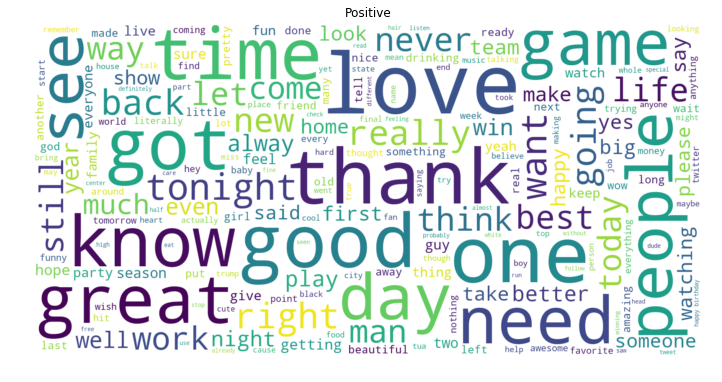

In [219]:
wordcloud = WordCloud(background_color="white",width=1600, height=800, max_font_size=200,margin=10,random_state=1).generate(pos_text)
plt.figure(figsize=(12,10))
plt.title("Positive")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

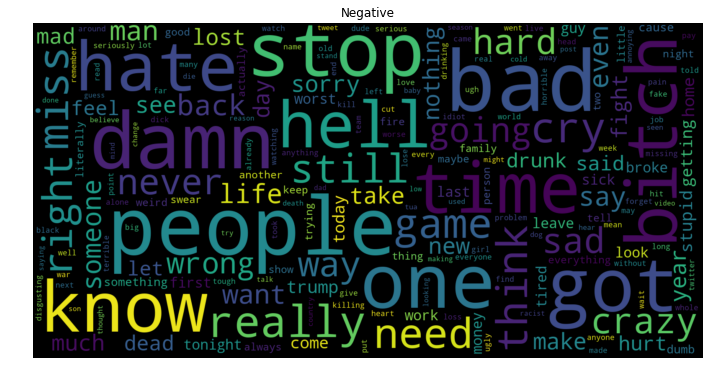

In [220]:
wordcloud = WordCloud(width=1600, height=800, max_font_size=200,margin=10,random_state=1).generate(neg_text)
plt.figure(figsize=(12,10))
plt.title("Negative")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

<font><b><h2 class="alert alert-block alert-info">DATA CLEANING</h2></b></font>

In [127]:
df.isnull().sum()

User_id               0
Username              0
User_location         0
Place_CountryCode    10
Place_FullName        0
Original_Tweet        0
Clean_Tweet           0
Place_Coordinates     0
Suicide_Ideation      0
sentiment             0
dtype: int64

In [128]:
df.loc[df['Place_Coordinates'] == 'None']

,User_id,Username,User_location,Place_CountryCode,Place_FullName,Original_Tweet,Clean_Tweet,Place_Coordinates,Suicide_Ideation,sentiment


In [129]:
df.dropna(subset=['Clean_Tweet','Place_Coordinates','User_id'],inplace=True)
df.shape

(17746, 10)

In [130]:
df['Place_CountryCode'].value_counts()

US    17115
CA      621
Name: Place_CountryCode, dtype: int64

In [131]:
df = df.drop(df[(df['Place_CountryCode']!='US') ].index)
df.head()

,User_id,Username,User_location,Place_CountryCode,Place_FullName,Original_Tweet,Clean_Tweet,Place_Coordinates,Suicide_Ideation,sentiment
0,4.127702e+08,momariedavison,"Minnetonka, MN",US,"Prior Lake, MN",truly sooo glad i’ve been distancing myself fr...,truly glad specific people feel becoming happi...,"[[[-93.489043, 44.685054], [-93.489043, 44.761...",Not_Suicide_Post,Positive
1,7.400837e+07,juarus,"Gadsden, Alabama",US,"Gadsden, AL",little smoked chicken potpie action eastsidepi...,little smoked chicken potpie action,"[[[-86.079043, 33.933091], [-86.079043, 34.073...",Not_Suicide_Post,Positive
2,8.447132e+08,Tessv234,"San Marcos, Texas",US,"San Marcos, TX",u had to show hem the lizzie mcguire episode o...,show hem episode singing special suite life,"[[[-97.993537, 29.840708], [-97.993537, 29.950...",Not_Suicide_Post,Positive
3,3.212212e+08,jpenntaughtme,"No Name, CO",US,"Colorado, USA",clown now we know everything you say is just ...,clown know everything say dumb get people talk...,"[[[-109.060257, 36.992427], [-109.060257, 41.0...",Not_Suicide_Post,Negative
4,9.270000e+17,rosegirl14hotm2,United States,US,"Alabama, USA",love it here comes the tide rolling,love come tide rolling,"[[[-88.473228, 30.144425], [-88.473228, 35.008...",Not_Suicide_Post,Positive


In [132]:
df.isnull().sum()

User_id              0
Username             0
User_location        0
Place_CountryCode    0
Place_FullName       0
Original_Tweet       0
Clean_Tweet          0
Place_Coordinates    0
Suicide_Ideation     0
sentiment            0
dtype: int64

In [133]:
df=df[df.Place_Coordinates != 'None']
df.shape

(17115, 10)

In [206]:
df.loc[df['Place_Coordinates'] == 'None']

,User_id,Username,User_location,Place_CountryCode,Place_FullName,Original_Tweet,Clean_Tweet,Place_Coordinates,Suicide_Ideation,sentiment,centroid,latitude,longitude,P_POS,P_NEG,Not_Suicide,Suicide


<font><div class="alert alert-block alert-info">Calculate the latitude and longitude from the Centroid</div></font>

In [135]:
#Function to return the centroid of a bounding box of longitude, latitude coordinates
def get_latitude(row):
    
    try:
        row_ = eval(row)
        list_of_coords = [item for sub_list in row_ for item in sub_list]
        latitude = [p[1] for p in list_of_coords]
        return sum(latitude) / float(len(latitude))
    except:
        return None

In [136]:
#Function to return the centroid of a bounding box of longitude, latitude coordinates
def get_longitude(row):
    
    try:
        row_ = eval(row)
        list_of_coords = [item for sub_list in row_ for item in sub_list]
        longitude = [p[0] for p in list_of_coords]
        return sum(longitude) / float(len(longitude))
    except:
        return None

In [137]:
def Calc_centroid(row):
    
    try:
        row_ = eval(row)
        list_of_coords = [item for sub_list in row_ for item in sub_list]
        latitude = [p[1] for p in list_of_coords]
        longitude = [p[0] for p in list_of_coords]
        return sum(latitude) / float(len(latitude)),sum(longitude) / float(len(longitude))
    except:
        return None

In [138]:
# Create a new column called 'centroid' 
df['centroid'] = list(map(lambda row: Calc_centroid(row), df['Place_Coordinates']))
df.dropna(subset=['centroid'],inplace=True)
df['latitude'] = list(map(lambda row: get_latitude(row), df['Place_Coordinates']))
df['longitude'] = list(map(lambda row: get_longitude(row), df['Place_Coordinates']))
df.dropna(subset=['latitude','longitude'],inplace=True)
df.head(5)

,User_id,Username,User_location,Place_CountryCode,Place_FullName,Original_Tweet,Clean_Tweet,Place_Coordinates,Suicide_Ideation,sentiment,centroid,latitude,longitude
0,4.127702e+08,momariedavison,"Minnetonka, MN",US,"Prior Lake, MN",truly sooo glad i’ve been distancing myself fr...,truly glad specific people feel becoming happi...,"[[[-93.489043, 44.685054], [-93.489043, 44.761...",Not_Suicide_Post,Positive,"(44.723144500000004, -93.434323)",44.723145,-93.434323
1,7.400837e+07,juarus,"Gadsden, Alabama",US,"Gadsden, AL",little smoked chicken potpie action eastsidepi...,little smoked chicken potpie action,"[[[-86.079043, 33.933091], [-86.079043, 34.073...",Not_Suicide_Post,Positive,"(34.003125, -86.00682950000001)",34.003125,-86.006830
2,8.447132e+08,Tessv234,"San Marcos, Texas",US,"San Marcos, TX",u had to show hem the lizzie mcguire episode o...,show hem episode singing special suite life,"[[[-97.993537, 29.840708], [-97.993537, 29.950...",Not_Suicide_Post,Positive,"(29.8956065, -97.9351915)",29.895606,-97.935192
3,3.212212e+08,jpenntaughtme,"No Name, CO",US,"Colorado, USA",clown now we know everything you say is just ...,clown know everything say dumb get people talk...,"[[[-109.060257, 36.992427], [-109.060257, 41.0...",Not_Suicide_Post,Negative,"(38.997935999999996, -105.5508905)",38.997936,-105.550890
4,9.270000e+17,rosegirl14hotm2,United States,US,"Alabama, USA",love it here comes the tide rolling,love come tide rolling,"[[[-88.473228, 30.144425], [-88.473228, 35.008...",Not_Suicide_Post,Positive,"(32.576227, -86.68073749999999)",32.576227,-86.680737


In [139]:
df.reset_index(drop=True, inplace=True)

<font><div class="alert alert-block alert-info">Update the Sentiment Text to a Number. Converting categorical data to Numeric</div></font>

In [141]:
df.loc[df['sentiment'] == 'Positive','P_POS'] = 1
df.loc[df['sentiment'] == 'Negative','P_NEG'] = -1
df.head(2)

,User_id,Username,User_location,Place_CountryCode,Place_FullName,Original_Tweet,Clean_Tweet,Place_Coordinates,Suicide_Ideation,sentiment,centroid,latitude,longitude,P_POS,P_NEG
0,412770174.0,momariedavison,"Minnetonka, MN",US,"Prior Lake, MN",truly sooo glad i’ve been distancing myself fr...,truly glad specific people feel becoming happi...,"[[[-93.489043, 44.685054], [-93.489043, 44.761...",Not_Suicide_Post,Positive,"(44.723144500000004, -93.434323)",44.723145,-93.434323,1.0,NaN
1,74008370.0,juarus,"Gadsden, Alabama",US,"Gadsden, AL",little smoked chicken potpie action eastsidepi...,little smoked chicken potpie action,"[[[-86.079043, 33.933091], [-86.079043, 34.073...",Not_Suicide_Post,Positive,"(34.003125, -86.00682950000001)",34.003125,-86.006830,1.0,NaN


In [142]:
df['P_POS'].fillna(0, inplace=True)
df['P_NEG'].fillna(0, inplace=True)
df.head(2)

,User_id,Username,User_location,Place_CountryCode,Place_FullName,Original_Tweet,Clean_Tweet,Place_Coordinates,Suicide_Ideation,sentiment,centroid,latitude,longitude,P_POS,P_NEG
0,412770174.0,momariedavison,"Minnetonka, MN",US,"Prior Lake, MN",truly sooo glad i’ve been distancing myself fr...,truly glad specific people feel becoming happi...,"[[[-93.489043, 44.685054], [-93.489043, 44.761...",Not_Suicide_Post,Positive,"(44.723144500000004, -93.434323)",44.723145,-93.434323,1.0,0.0
1,74008370.0,juarus,"Gadsden, Alabama",US,"Gadsden, AL",little smoked chicken potpie action eastsidepi...,little smoked chicken potpie action,"[[[-86.079043, 33.933091], [-86.079043, 34.073...",Not_Suicide_Post,Positive,"(34.003125, -86.00682950000001)",34.003125,-86.006830,1.0,0.0


In [143]:
df.loc[df['Suicide_Ideation'] == 'Not_Suicide_Post','Not_Suicide'] = 1
df.loc[df['Suicide_Ideation'] == 'Potential_Suicide_Post','Suicide'] = -1
df['Not_Suicide'].fillna(0, inplace=True)
df['Suicide'].fillna(0, inplace=True)
df.head(2)

,User_id,Username,User_location,Place_CountryCode,Place_FullName,Original_Tweet,Clean_Tweet,Place_Coordinates,Suicide_Ideation,sentiment,centroid,latitude,longitude,P_POS,P_NEG,Not_Suicide,Suicide
0,412770174.0,momariedavison,"Minnetonka, MN",US,"Prior Lake, MN",truly sooo glad i’ve been distancing myself fr...,truly glad specific people feel becoming happi...,"[[[-93.489043, 44.685054], [-93.489043, 44.761...",Not_Suicide_Post,Positive,"(44.723144500000004, -93.434323)",44.723145,-93.434323,1.0,0.0,1.0,0.0
1,74008370.0,juarus,"Gadsden, Alabama",US,"Gadsden, AL",little smoked chicken potpie action eastsidepi...,little smoked chicken potpie action,"[[[-86.079043, 33.933091], [-86.079043, 34.073...",Not_Suicide_Post,Positive,"(34.003125, -86.00682950000001)",34.003125,-86.006830,1.0,0.0,1.0,0.0


In [144]:
df.loc[df['sentiment'] == 'Positive', ['sentiment']] = 1
df.loc[df['sentiment'] == 'Negative', ['sentiment']] = -1
df.loc[df['Suicide_Ideation'] == 'Not_Suicide_Post', ['Suicide_Ideation']] = 1
df.loc[df['Suicide_Ideation'] == 'Potential_Suicide_Post', ['Suicide_Ideation']] = -1
df.head(2)

,User_id,Username,User_location,Place_CountryCode,Place_FullName,Original_Tweet,Clean_Tweet,Place_Coordinates,Suicide_Ideation,sentiment,centroid,latitude,longitude,P_POS,P_NEG,Not_Suicide,Suicide
0,412770174.0,momariedavison,"Minnetonka, MN",US,"Prior Lake, MN",truly sooo glad i’ve been distancing myself fr...,truly glad specific people feel becoming happi...,"[[[-93.489043, 44.685054], [-93.489043, 44.761...",1,1,"(44.723144500000004, -93.434323)",44.723145,-93.434323,1.0,0.0,1.0,0.0
1,74008370.0,juarus,"Gadsden, Alabama",US,"Gadsden, AL",little smoked chicken potpie action eastsidepi...,little smoked chicken potpie action,"[[[-86.079043, 33.933091], [-86.079043, 34.073...",1,1,"(34.003125, -86.00682950000001)",34.003125,-86.006830,1.0,0.0,1.0,0.0


In [145]:
df.head(10)

,User_id,Username,User_location,Place_CountryCode,Place_FullName,Original_Tweet,Clean_Tweet,Place_Coordinates,Suicide_Ideation,sentiment,centroid,latitude,longitude,P_POS,P_NEG,Not_Suicide,Suicide
0,4.127702e+08,momariedavison,"Minnetonka, MN",US,"Prior Lake, MN",truly sooo glad i’ve been distancing myself fr...,truly glad specific people feel becoming happi...,"[[[-93.489043, 44.685054], [-93.489043, 44.761...",1,1,"(44.723144500000004, -93.434323)",44.723145,-93.434323,1.0,0.0,1.0,0.0
1,7.400837e+07,juarus,"Gadsden, Alabama",US,"Gadsden, AL",little smoked chicken potpie action eastsidepi...,little smoked chicken potpie action,"[[[-86.079043, 33.933091], [-86.079043, 34.073...",1,1,"(34.003125, -86.00682950000001)",34.003125,-86.006830,1.0,0.0,1.0,0.0
2,8.447132e+08,Tessv234,"San Marcos, Texas",US,"San Marcos, TX",u had to show hem the lizzie mcguire episode o...,show hem episode singing special suite life,"[[[-97.993537, 29.840708], [-97.993537, 29.950...",1,1,"(29.8956065, -97.9351915)",29.895606,-97.935192,1.0,0.0,1.0,0.0
3,3.212212e+08,jpenntaughtme,"No Name, CO",US,"Colorado, USA",clown now we know everything you say is just ...,clown know everything say dumb get people talk...,"[[[-109.060257, 36.992427], [-109.060257, 41.0...",1,-1,"(38.997935999999996, -105.5508905)",38.997936,-105.550890,0.0,-1.0,1.0,0.0
4,9.270000e+17,rosegirl14hotm2,United States,US,"Alabama, USA",love it here comes the tide rolling,love come tide rolling,"[[[-88.473228, 30.144425], [-88.473228, 35.008...",1,1,"(32.576227, -86.68073749999999)",32.576227,-86.680737,1.0,0.0,1.0,0.0
5,1.312712e+07,mesjak,"Minneapolis, MN",US,"Minneapolis, MN",breaking out the nick amp nora glasses for a...,breaking nick glass nicely icy tonight recipe,"[[[-93.329515, 44.889964], [-93.329515, 45.051...",1,1,"(44.9706105, -93.2620465)",44.970610,-93.262046,1.0,0.0,1.0,0.0
6,2.648860e+09,lexitishmack,None,US,AT&T Center: Terrace Level,think i fell in love with hockey tonight,think fell love hockey tonight,"[[[-98.437045, 29.426937], [-98.437045, 29.426...",1,1,"(29.426937, -98.437045)",29.426937,-98.437045,1.0,0.0,1.0,0.0
7,4.978479e+07,QueerAspie1,Wherever Trump Is Not.,US,"Delaware, USA",guess that would explain why they never got in...,guess would explain never got involved,"[[[-75.788756, 38.45104], [-75.788756, 39.8390...",1,1,"(39.1450235, -75.38646050000001)",39.145024,-75.386461,1.0,0.0,1.0,0.0
8,3.715605e+07,LESSfunDARIA,"Evanston, IL",US,"Evanston, IL",this ain’t me at work every single day,work every single day,"[[[-87.733451, 42.019151], [-87.733451, 42.071...",1,1,"(42.045437, -87.6991955)",42.045437,-87.699196,1.0,0.0,1.0,0.0
9,2.148135e+07,mikihasa,"Canton, Michigan",US,"Michigan, USA",thug or geek showing off the hoodie i got fo...,thug geek showing hoodie got birthday today th...,"[[[-90.418108, 41.696088], [-90.418108, 48.306...",1,1,"(45.001180000000005, -86.27053950000001)",45.001180,-86.270540,1.0,0.0,1.0,0.0


In [146]:
df['Original_Tweet'][df['P_POS'] == 1].head(5).unique()

array(['truly sooo glad i’ve been distancing myself from specific people  i can feel myself becoming happier day by day',
       'little smoked chicken potpie action eastsidepieaction  ',
       'u had to show hem the lizzie mcguire episode of him singing on the christmas special or the suite life of zack and cody   ',
       'love it   here comes the tide rolling ',
       'breaking out the nick  amp  nora glasses for a nicely icy boulevardier tonight  recipe from bonappetitmag minneapolis  minnesota  '],
      dtype=object)

In [147]:
df['Original_Tweet'][df['P_NEG'] == -1].head(5).unique()

array(['clown  now we know everything you say is just some dumb shit to get people talking but get your bag i suppose ',
       'there’s nothing like texas high school football   txhsfb  ',
       'sorry  as corrected by the current power outage in is occurring on 12 08 2018  current time is 20 37 ',
       'ever been so sad all you wanna do is sleep',
       'please get in touch with and ask him to look into the case of cynthia brown   she’s the year old who is looking at years for killing her year old rapist '],
      dtype=object)

In [148]:
df['Original_Tweet'][df['Suicide'] == -1].head(5).unique()

array(['come out tomorrow and watch the houstontexans try to win an unprecedented 10th straight  we’ll have dante’s pop up serving some really good game time food  come cheer on the good guys 🤘 …  ',
       'yeah he saw it too late  tried to jump back inside but that hole closed fast  cohen does this a lot  missed one last week and it was a huge hole right up the gut  seems like his first intent is to bounce outside than look to the a gaps rather than a gap first than bounce it out ',
       'like listen    if you don’t like ya life   change it  you don’t have confidence or self love   change it  make small changes in your life so that you can stop being jealous and live the way you should be instead of being a hating ass bitch  thank yew ',
       'it would be cool to see lock go high enough to play right away i would love for him to fall to a place where could study under a master  imagine drew lock taking over for a drew brees in years ',
       'merry fuckin  christmas to me  my da

In [149]:
df['Original_Tweet'][df['Not_Suicide'] == 1].head(5).unique()

array(['truly sooo glad i’ve been distancing myself from specific people  i can feel myself becoming happier day by day',
       'little smoked chicken potpie action eastsidepieaction  ',
       'u had to show hem the lizzie mcguire episode of him singing on the christmas special or the suite life of zack and cody   ',
       'clown  now we know everything you say is just some dumb shit to get people talking but get your bag i suppose ',
       'love it   here comes the tide rolling '], dtype=object)

In [150]:
df_negative = df[df['P_NEG']==-1]
print(df_negative.shape)
df_negative.head()

(2885, 17)


,User_id,Username,User_location,Place_CountryCode,Place_FullName,Original_Tweet,Clean_Tweet,Place_Coordinates,Suicide_Ideation,sentiment,centroid,latitude,longitude,P_POS,P_NEG,Not_Suicide,Suicide
3,3.212212e+08,jpenntaughtme,"No Name, CO",US,"Colorado, USA",clown now we know everything you say is just ...,clown know everything say dumb get people talk...,"[[[-109.060257, 36.992427], [-109.060257, 41.0...",1,-1,"(38.997935999999996, -105.5508905)",38.997936,-105.550890,0.0,-1.0,1.0,0.0
13,9.440000e+17,TOCAshton247,United States,US,"Austin, TX",there’s nothing like texas high school footbal...,nothing like high school football,"[[[-97.928935, 30.127892], [-97.928935, 30.518...",1,-1,"(30.323345500000002, -97.754724)",30.323346,-97.754724,0.0,-1.0,1.0,0.0
17,9.085859e+07,MrDaftPrawn,City 17,US,"Decatur, AL",sorry as corrected by the current power outag...,sorry corrected current power outage current time,"[[[-87.095676, 34.507116], [-87.095676, 34.654...",1,-1,"(34.580925, -87.010551)",34.580925,-87.010551,0.0,-1.0,1.0,0.0
27,9.650000e+17,emily04505039,Newton tx,US,"Texas, USA",ever been so sad all you wanna do is sleep,ever sad sleep,"[[[-106.645646, 25.837092], [-106.645646, 36.5...",1,-1,"(31.1688935, -100.0768885)",31.168893,-100.076888,0.0,-1.0,1.0,0.0
36,1.292663e+09,sandra_clayton,None,US,"Mooresville, NC",please get in touch with and ask him to look i...,please get touch ask look case brown year old ...,"[[[-80.961004, 35.495207], [-80.961004, 35.641...",1,-1,"(35.568434499999995, -80.86455649999999)",35.568434,-80.864556,0.0,-1.0,1.0,0.0


## CLUSTERING

<font><div class="alert alert-block alert-info">Performing Clustering on the Negative Sentiment.
    <ul><li>K-Means</li><li>DB-Scan</li></ul></div></font>

In [151]:
df_negative.reset_index(drop=True, inplace=True)
df_negative.head()

,User_id,Username,User_location,Place_CountryCode,Place_FullName,Original_Tweet,Clean_Tweet,Place_Coordinates,Suicide_Ideation,sentiment,centroid,latitude,longitude,P_POS,P_NEG,Not_Suicide,Suicide
0,3.212212e+08,jpenntaughtme,"No Name, CO",US,"Colorado, USA",clown now we know everything you say is just ...,clown know everything say dumb get people talk...,"[[[-109.060257, 36.992427], [-109.060257, 41.0...",1,-1,"(38.997935999999996, -105.5508905)",38.997936,-105.550890,0.0,-1.0,1.0,0.0
1,9.440000e+17,TOCAshton247,United States,US,"Austin, TX",there’s nothing like texas high school footbal...,nothing like high school football,"[[[-97.928935, 30.127892], [-97.928935, 30.518...",1,-1,"(30.323345500000002, -97.754724)",30.323346,-97.754724,0.0,-1.0,1.0,0.0
2,9.085859e+07,MrDaftPrawn,City 17,US,"Decatur, AL",sorry as corrected by the current power outag...,sorry corrected current power outage current time,"[[[-87.095676, 34.507116], [-87.095676, 34.654...",1,-1,"(34.580925, -87.010551)",34.580925,-87.010551,0.0,-1.0,1.0,0.0
3,9.650000e+17,emily04505039,Newton tx,US,"Texas, USA",ever been so sad all you wanna do is sleep,ever sad sleep,"[[[-106.645646, 25.837092], [-106.645646, 36.5...",1,-1,"(31.1688935, -100.0768885)",31.168893,-100.076888,0.0,-1.0,1.0,0.0
4,1.292663e+09,sandra_clayton,None,US,"Mooresville, NC",please get in touch with and ask him to look i...,please get touch ask look case brown year old ...,"[[[-80.961004, 35.495207], [-80.961004, 35.641...",1,-1,"(35.568434499999995, -80.86455649999999)",35.568434,-80.864556,0.0,-1.0,1.0,0.0


<font><div class="alert alert-block alert-info">Obtain the Latitude and Longitude to pass for Clustering</div></font>

In [152]:
location_data_array = np.array([df_negative['centroid']])
location_data_matrix = df_negative.as_matrix(columns=['latitude','longitude'])
print(location_data_matrix[0][0])

38.997935999999996


/Users/vijaymysore/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


<font>K-Means with 10 clusters</font>

In [154]:
X = np.array(latLong)
kmeans = KMeans(n_clusters=10, random_state=0).fit(location_data_matrix)
id_label=kmeans.labels_
print(kmeans.cluster_centers_)

In [156]:
df_negative.loc[df_negative['latitude'].idxmin()]

User_id                                                    5.28893e+08
Username                                                 HURRICANEPAUL
User_location                                            Kailua Hawaii
Place_CountryCode                                                   US
Place_FullName                                            Honolulu, HI
Original_Tweet        when i m locked up in prison  i can t commit ...
Clean_Tweet                                       locked prison commit
Place_Coordinates    [[[-157.950476, 21.254837], [-157.950476, 21.3...
Suicide_Ideation                                                     1
sentiment                                                           -1
centroid                             (21.319943499999997, -157.799589)
latitude                                                       21.3199
longitude                                                       -157.8
P_POS                                                                0
P_NEG 

<font><div class="alert alert-block alert-info">Selecting the number of clusters with silhouette analysis on KMeans clustering</div></font>

In [222]:
X, y = makeblobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)

clusters_range = [2, 3, 4, 5, 6,10]

for n_clusters in clusters_range:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(location_data_matrix)

    # The silhouette_score gives the average value for all the samples.
    silhouette_avg = silhouette_score(location_data_matrix, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    sample_silhouette_values = silhouette_samples(location_data_matrix, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(location_data_matrix[:, 0], location_data_matrix[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')
    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

NameError: name 'makeblobs' is not defined

In [158]:
clusters = {}
for idx, label in enumerate(kmeans.labels_):
    clusters[idx]= label

In [159]:
df_negative['KMeans_Cluster'] = clusters.values()

/Users/vijaymysore/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [160]:
df_negative.head(2)

,User_id,Username,User_location,Place_CountryCode,Place_FullName,Original_Tweet,Clean_Tweet,Place_Coordinates,Suicide_Ideation,sentiment,centroid,latitude,longitude,P_POS,P_NEG,Not_Suicide,Suicide,KMeans_Cluster
0,3.212212e+08,jpenntaughtme,"No Name, CO",US,"Colorado, USA",clown now we know everything you say is just ...,clown know everything say dumb get people talk...,"[[[-109.060257, 36.992427], [-109.060257, 41.0...",1,-1,"(38.997935999999996, -105.5508905)",38.997936,-105.550890,0.0,-1.0,1.0,0.0,1
1,9.440000e+17,TOCAshton247,United States,US,"Austin, TX",there’s nothing like texas high school footbal...,nothing like high school football,"[[[-97.928935, 30.127892], [-97.928935, 30.518...",1,-1,"(30.323345500000002, -97.754724)",30.323346,-97.754724,0.0,-1.0,1.0,0.0,8


In [161]:
df_negative['KMeans_Cluster'].value_counts()

0    602
3    566
5    461
8    446
6    336
9    210
1    135
2    117
4     10
7      2
Name: KMeans_Cluster, dtype: int64

In [162]:
df_negative.loc[df_negative['KMeans_Cluster']==7]

,User_id,Username,User_location,Place_CountryCode,Place_FullName,Original_Tweet,Clean_Tweet,Place_Coordinates,Suicide_Ideation,sentiment,centroid,latitude,longitude,P_POS,P_NEG,Not_Suicide,Suicide,KMeans_Cluster
198,169295441.0,Seldovian,"Seldovia, AK",US,"Alaska, USA",awful perty today seldovia village alaska,awful perty today village,"[[[-179.231086, 51.175093], [-179.231086, 71.4...",1,-1,"(61.304725000000005, 0.3142995000000042)",61.304725,0.3143,0.0,-1.0,1.0,0.0,7
445,169295441.0,Seldovian,"Seldovia, AK",US,"Alaska, USA",hombre is soft shooting but hard hitting with ...,soft shooting hard bay,"[[[-179.231086, 51.175093], [-179.231086, 71.4...",1,-1,"(61.304725000000005, 0.3142995000000042)",61.304725,0.3143,0.0,-1.0,1.0,0.0,7


In [163]:
(df_negative.loc[df_negative['KMeans_Cluster']==4]).sort_values(by=['Place_FullName']).head(5)

,User_id,Username,User_location,Place_CountryCode,Place_FullName,Original_Tweet,Clean_Tweet,Place_Coordinates,Suicide_Ideation,sentiment,centroid,latitude,longitude,P_POS,P_NEG,Not_Suicide,Suicide,KMeans_Cluster
1155,1.023107e+09,PCGamerzHawaii,Hawaii,US,"Aiea, HI",another new customer build ryzen 2700x 16gb ...,another new customer build sea hawk corsair ri...,"[[[-157.943639, 21.374177], [-157.943639, 21.4...",1,-1,"(21.397737, -157.8975645)",21.397737,-157.897564,0.0,-1.0,1.0,0.0,4
518,1.030000e+18,TBEShawn_,None,US,"Heeia, HI",kid threatens to kill my whole family then sen...,kill whole family,"[[[-157.826522, 21.408367], [-157.826522, 21.4...",1,-1,"(21.423675, -157.809563)",21.423675,-157.809563,0.0,-1.0,1.0,0.0,4
765,5.288932e+08,HURRICANEPAUL,Kailua Hawaii,US,"Honolulu, HI",when i m locked up in prison i can t commit ...,locked prison commit,"[[[-157.950476, 21.254837], [-157.950476, 21.3...",1,-1,"(21.319943499999997, -157.799589)",21.319943,-157.799589,0.0,-1.0,1.0,0.0,4
2162,5.288932e+08,HURRICANEPAUL,Kailua Hawaii,US,"Honolulu, HI",mueller come on man give me a break i ve g...,come man give break got nothing trump clean te...,"[[[-157.950476, 21.254837], [-157.950476, 21.3...",1,-1,"(21.319943499999997, -157.799589)",21.319943,-157.799589,0.0,-1.0,1.0,0.0,4
2169,3.027191e+08,PacificSoulTat2,Honolulu,US,"Honolulu, HI",come down walk ins always welcomed tattoos b...,come walk always jack dirty pant pacific soul,"[[[-157.950476, 21.254837], [-157.950476, 21.3...",1,-1,"(21.319943499999997, -157.799589)",21.319943,-157.799589,0.0,-1.0,1.0,0.0,4


In [164]:
(df_negative.loc[df_negative['KMeans_Cluster']==0]).sort_values(by=['Place_FullName']).head(5)

,User_id,Username,User_location,Place_CountryCode,Place_FullName,Original_Tweet,Clean_Tweet,Place_Coordinates,Suicide_Ideation,sentiment,centroid,latitude,longitude,P_POS,P_NEG,Not_Suicide,Suicide,KMeans_Cluster
1542,1.568253e+08,chrome_styles,pg chilling,US,"Adelphi, MD",club it’s cold as hell,club cold hell,"[[[-76.983633, 38.975969], [-76.983633, 39.022...",1,-1,"(38.9990405, -76.96076500000001)",38.999040,-76.960765,0.0,-1.0,1.0,0.0,0
1046,3.999241e+09,breathtkinan,Yoknapatawpha County,US,"Alexandria, VA",fucking hipsters ruin everything,ruin everything,"[[[-77.144435, 38.789907], [-77.144435, 38.844...",1,-1,"(38.81738, -77.0908695)",38.817380,-77.090869,0.0,-1.0,1.0,0.0,0
1245,1.973697e+08,ryanlhonick,"Washington, D.C",US,"Alexandria, VA",two velcro patches and a neon leash wrap and m...,two neon leash wrap public pretend read approa...,"[[[-77.144435, 38.789907], [-77.144435, 38.844...",1,-1,"(38.81738, -77.0908695)",38.817380,-77.090869,0.0,-1.0,1.0,0.0,0
1672,1.729826e+09,klpbirds,"38.815362N, 77.122095W",US,"Alexandria, VA",congratulations on nibbling i have been known...,known tad greedy,"[[[-77.144435, 38.789907], [-77.144435, 38.844...",1,-1,"(38.81738, -77.0908695)",38.817380,-77.090869,0.0,-1.0,1.0,0.0,0
308,7.190000e+17,fabiellie_m,The zoo,US,"Amherst, MA",moms upset i look grown 🤣,upset look grown,"[[[-72.537784, 42.329754], [-72.537784, 42.401...",1,-1,"(42.365501, -72.497865)",42.365501,-72.497865,0.0,-1.0,1.0,0.0,0


<font><div class="alert alert-block alert-info">Clustering Users with Negative Tweets based on their Location</div></font>

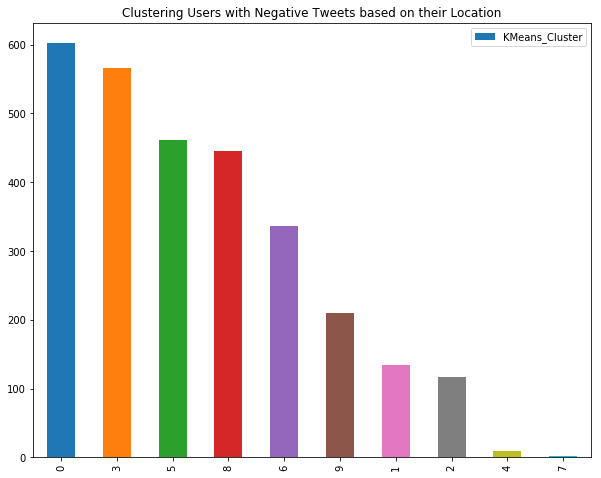

In [165]:
fig, ax = plt.subplots()
df_negative['KMeans_Cluster'].value_counts().plot(ax=ax, kind='bar',figsize=(10,8), 
                title='Clustering Users with Negative Tweets based on their Location',
                x='KMeans Clusters', y='Count of Users in each Cluster',legend=True)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(location_data_matrix[:,0],location_data_matrix[:,1],c=kmeans[0],s=50)
plt.colrbar(scatter)
plt.show()

## DBSCAN

<font><div class="alert alert-block alert-info">Using Datashader</div></font>

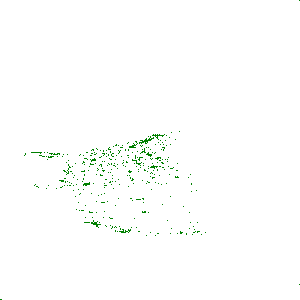

In [166]:
import datashader as ds
import datashader.transfer_functions as tf
cvs = ds.Canvas(plot_width=300, plot_height=300)
agg = cvs.points(df_negative,'latitude','longitude')
tf.shade(agg,cmap=['green'])

In [167]:
from sklearn.cluster import DBSCAN
coords = df_negative.as_matrix(columns=['latitude','longitude'])
db = DBSCAN(eps=0.01, min_samples=50, metric='haversine').fit(np.radians(coords))
df_negative['dbscan_cluster'] = db.labels_
clusters = df_negative.dbscan_cluster.unique()
df_negative.head()

/Users/vijaymysore/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


DBSCAN(algorithm='auto', eps=0.01, leaf_size=30, metric='haversine',
    metric_params=None, min_samples=50, n_jobs=None, p=None)

In [169]:
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)


Estimated number of clusters: 10
Estimated number of noise points: 1815


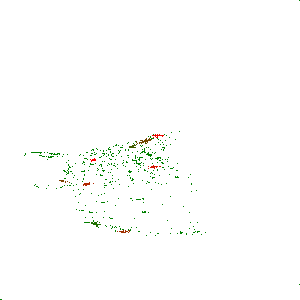

In [170]:
import datashader as ds
import datashader.transfer_functions as tf
# Visualize points with datashader
from matplotlib.colors import Colormap
cvs = ds.Canvas(plot_width=300, plot_height=300)
agg = cvs.points(df_negative, 'latitude', 'longitude', ds.mean('dbscan_cluster'))
#tf.set_background('black')
#tf.shade(agg)
tf.shade(agg, cmap=['green','red'])
#’#ff7f00’, ’#ffff33’, ’#a65628’, ’#f781bf ’, ’#999999’,
#’#66c2a5’, ’#fc8d62’, ’#8da0cb’, ’#a6d854’, ’#ffd92f ’,
#’#e5c494’, ’#ffffb3’, ’#fb8072’, ’#fdb462’, ’#fccde5’,
#’#d9d9d9’, ’#ccebc5’, ’#ffed6f ’],how='cbrt')
#tf.shade(agg, cmap=Colormap('Accent', 80))

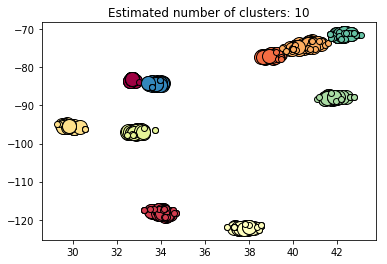

In [171]:
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        continue

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

### Suicide Ideation user's location identification and pattern analysis

<font><div class="alert alert-block alert-info">Performing K-Means on Suicidal Ideation Tweets</font></font>

In [172]:
df_suicide = df[df['Suicide']==-1]
print(df_suicide.shape)
df_suicide.head()

(123, 17)


,User_id,Username,User_location,Place_CountryCode,Place_FullName,Original_Tweet,Clean_Tweet,Place_Coordinates,Suicide_Ideation,sentiment,centroid,latitude,longitude,P_POS,P_NEG,Not_Suicide,Suicide
250,4.602602e+08,DnTDriveINN,"1307 Enid, Houston, TX 77009",US,"Houston, TX",come out tomorrow and watch the houstontexans ...,come tomorrow watch try win unprecedented stra...,"[[[-95.823268, 29.522325], [-95.823268, 30.154...",-1,1,"(29.838495, -95.44648649999999)",29.838495,-95.446486,1.0,0.0,0.0,-1.0
290,2.727488e+07,jjhatelak,"Miller Beach,Indiana",US,"Gary, IN",yeah he saw it too late tried to jump back in...,yeah saw late tried jump back inside hole clos...,"[[[-87.433258, 41.521967], [-87.433258, 41.649...",-1,1,"(41.585848999999996, -87.32773350000001)",41.585849,-87.327734,1.0,0.0,0.0,-1.0
378,2.847708e+09,kie2urheart,United States,US,"Virginia, USA",like listen if you don’t like ya life cha...,like listen like life change confidence self l...,"[[[-83.67529, 36.540739], [-83.67529, 39.46601...",-1,1,"(38.003375500000004, -79.42086499999999)",38.003376,-79.420865,1.0,0.0,0.0,-1.0
414,1.568380e+09,zackstl,"St. Charles, MO",US,"St Charles, MO",it would be cool to see lock go high enough to...,would cool see lock high enough play right awa...,"[[[-90.570657, 38.737756], [-90.570657, 38.848...",-1,1,"(38.7930465, -90.517684)",38.793047,-90.517684,1.0,0.0,0.0,-1.0
532,2.680254e+09,caIigazes,"Los Angeles, CA",US,"Corona, CA",merry fuckin christmas to me my dad just bou...,merry dad bought see two time next year best p...,"[[[-117.672915, 33.802102], [-117.672915, 33.9...",-1,1,"(33.859093, -117.58565800000001)",33.859093,-117.585658,1.0,0.0,0.0,-1.0


In [173]:
location_data_array = np.array([df_suicide['centroid']])
location_data_matrix = df_suicide.as_matrix(columns=['latitude','longitude'])
print(location_data_matrix[0][0])

29.838495


/Users/vijaymysore/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [174]:
X = np.array(latLong)
kmeans = KMeans(n_clusters=10, random_state=0).fit(location_data_matrix)
id_label=kmeans.labels_

In [175]:
print(kmeans.cluster_centers_)

[[  34.65273911  -84.33001561]
 [  45.69114675 -122.04241412]
 [  34.86216193 -118.7586001 ]
 [  36.38460921  -97.24224979]
 [  41.704722    -72.63147747]
 [  39.40362977  -79.37844293]
 [  36.4810546  -110.04838375]
 [  41.49408745  -88.12476486]
 [  27.30314917  -81.24596025]
 [  30.42698415  -96.40236775]]


In [176]:
df_suicide.loc[df_suicide['latitude'].idxmin()]

User_id                                                      2.523e+07
Username                                                       954Nole
User_location                                            South Florida
Place_CountryCode                                                   US
Place_FullName                                               Miami, FL
Original_Tweet       the worst fsu season of my life there was a lo...
Clean_Tweet          worst season life lot big repair job going abl...
Place_Coordinates    [[[-80.321683, 25.70904], [-80.321683, 25.8556...
Suicide_Ideation                                                    -1
sentiment                                                            1
centroid                                     (25.7823535, -80.2333285)
latitude                                                       25.7824
longitude                                                     -80.2333
P_POS                                                                1
P_NEG 

In [178]:
clusters = {}
for idx, label in enumerate(kmeans.labels_):
    clusters[idx]= label

In [179]:
df_suicide['KMeans_Cluster'] = clusters.values()
df_suicide.head()

/Users/vijaymysore/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,User_id,Username,User_location,Place_CountryCode,Place_FullName,Original_Tweet,Clean_Tweet,Place_Coordinates,Suicide_Ideation,sentiment,centroid,latitude,longitude,P_POS,P_NEG,Not_Suicide,Suicide,KMeans_Cluster
250,4.602602e+08,DnTDriveINN,"1307 Enid, Houston, TX 77009",US,"Houston, TX",come out tomorrow and watch the houstontexans ...,come tomorrow watch try win unprecedented stra...,"[[[-95.823268, 29.522325], [-95.823268, 30.154...",-1,1,"(29.838495, -95.44648649999999)",29.838495,-95.446486,1.0,0.0,0.0,-1.0,9
290,2.727488e+07,jjhatelak,"Miller Beach,Indiana",US,"Gary, IN",yeah he saw it too late tried to jump back in...,yeah saw late tried jump back inside hole clos...,"[[[-87.433258, 41.521967], [-87.433258, 41.649...",-1,1,"(41.585848999999996, -87.32773350000001)",41.585849,-87.327734,1.0,0.0,0.0,-1.0,7
378,2.847708e+09,kie2urheart,United States,US,"Virginia, USA",like listen if you don’t like ya life cha...,like listen like life change confidence self l...,"[[[-83.67529, 36.540739], [-83.67529, 39.46601...",-1,1,"(38.003375500000004, -79.42086499999999)",38.003376,-79.420865,1.0,0.0,0.0,-1.0,5
414,1.568380e+09,zackstl,"St. Charles, MO",US,"St Charles, MO",it would be cool to see lock go high enough to...,would cool see lock high enough play right awa...,"[[[-90.570657, 38.737756], [-90.570657, 38.848...",-1,1,"(38.7930465, -90.517684)",38.793047,-90.517684,1.0,0.0,0.0,-1.0,7
532,2.680254e+09,caIigazes,"Los Angeles, CA",US,"Corona, CA",merry fuckin christmas to me my dad just bou...,merry dad bought see two time next year best p...,"[[[-117.672915, 33.802102], [-117.672915, 33.9...",-1,1,"(33.859093, -117.58565800000001)",33.859093,-117.585658,1.0,0.0,0.0,-1.0,2


In [180]:
df_suicide['KMeans_Cluster'].value_counts()

5    20
2    20
0    18
4    17
7    11
9    10
6    10
3     7
8     6
1     4
Name: KMeans_Cluster, dtype: int64

In [181]:
(df_suicide.loc[df_suicide['KMeans_Cluster']==8]).sort_values(by=['Place_FullName']).head(5)

,User_id,Username,User_location,Place_CountryCode,Place_FullName,Original_Tweet,Clean_Tweet,Place_Coordinates,Suicide_Ideation,sentiment,centroid,latitude,longitude,P_POS,P_NEG,Not_Suicide,Suicide,KMeans_Cluster
6332,7.880000e+17,TommyWh46349083,Land Of The Free,US,"Fuller Heights, FL",y do i overthink everything in my life and the...,keg make great keep great make great keep grea...,"[[[-82.014452, 27.89759], [-82.014452, 27.9385...",-1,1,"(27.918091500000003, -81.995432)",27.918092,-81.995432,1.0,0.0,0.0,-1.0,8
5247,9.630000e+17,OtherBaldGuy,"Sarasota, FL",US,"Laurel, FL",i hate feeling the way i do,amazing use little money make help build great...,"[[[-82.485978, 27.112997], [-82.485978, 27.175...",-1,1,"(27.144431000000004, -82.45977500000001)",27.144431,-82.459775,1.0,0.0,0.0,-1.0,8
6561,2.523002e+07,954Nole,South Florida,US,"Miami, FL",the worst fsu season of my life there was a lo...,worst season life lot big repair job going abl...,"[[[-80.321683, 25.70904], [-80.321683, 25.8556...",-1,1,"(25.7823535, -80.2333285)",25.782353,-80.233328,1.0,0.0,0.0,-1.0,8
3346,4.094147e+07,MorganCeili,California // Florida,US,"Orlando, FL",things are getting so real man i’m about to f...,getting real man finally get next month going ...,"[[[-81.507905, 28.388218], [-81.507905, 28.615...",-1,1,"(28.501678499999997, -81.3677725)",28.501678,-81.367773,1.0,0.0,0.0,-1.0,8
14932,9.860000e+17,RonHayn44510043,"New York, USA",US,"Pompano Beach, FL",say and do things that maybe we shouldn’t have...,say maybe error human coming heart help everyo...,"[[[-80.195561, 26.206136], [-80.195561, 26.297...",-1,1,"(26.251895, -80.1386455)",26.251895,-80.138645,1.0,0.0,0.0,-1.0,8


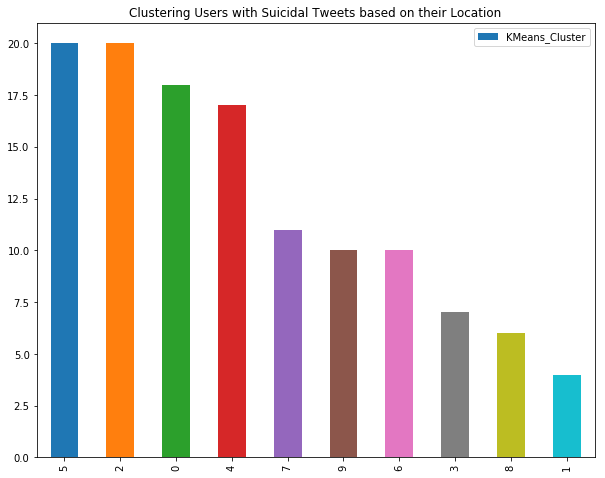

In [182]:
fig, ax = plt.subplots()
df_suicide['KMeans_Cluster'].value_counts().plot(ax=ax, kind='bar',figsize=(10,8), 
                title='Clustering Users with Suicidal Tweets based on their Location',
                x='KMeans Clusters', y='Count of Users in each Cluster',legend=True)
plt.show()